In [1]:
using Pkg
Pkg.activate("../..")

  Activating project at `~/Documents/repos/nanoOpt.jl`


In [2]:
using Measures,LinearAlgebra,LazyGrids,LaTeXStrings,QuadGK,Plots; pyplot()

Plots.PyPlotBackend()

In [3]:
using FastGaussQuadrature

In [4]:
using TimerOutputs

In [5]:
const to = TimerOutput();

In [6]:
include("../../src/NanoOpt.jl")

getEfieldInside (generic function with 1 method)

In [7]:
mat1 = material(1.33^2,1.0)
matSc = material(epstable("gold"),1.0)
mat2 = material(4.1^2,1.0);

In [8]:
matScatter = [mat1; matSc];

In [48]:
xC = (0.0,70.0)
a = 50.0
N = 20
m = 2

2

In [34]:
cyl = cylinder(a,N,xC);

In [35]:
xmin,ymin = -200.0,-200.0
xmax,ymax = 200.0,200.0
Δx,Δy = 20.0,20.0

xA = collect(xmin:Δx:xmax)
yA = collect(ymin:Δy:ymax)
Xin,Xout,Yin,Yout = getMesh(xA,yA,cyl);

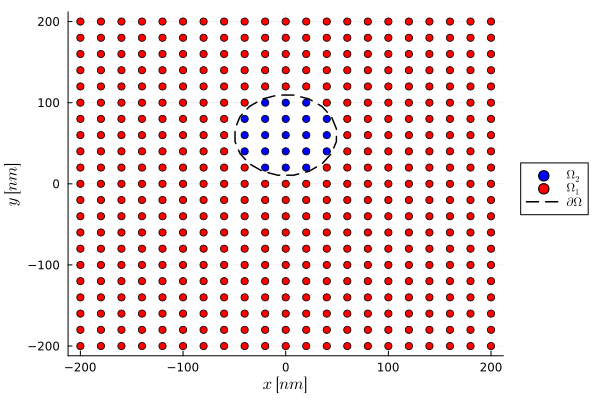

In [49]:
gr()
X,Y = getSurfPoints(cyl)
scatter(Xin,Yin,c=:blue,label=L"\Omega_2")
scatter!(Xout,Yout,c=:red,label=L"\Omega_1")
plot!(X,Y,c=:black,lw=1.5,ls=:dash,label=L"\partial \Omega",xlabel=L"x~[nm]",ylabel=L"y~[nm]",legend=:outerright)

In [50]:
dThr = 50.
m = 2

2

In [66]:
i = 1

k0 = 2π/520
n₁ = mat1.n(k0)
n₂ = mat2.n(k0)
r = 500.
α = 90.

90.0

In [67]:
Grf = GreenFunctions(matScatter,"Layer";xP= (300. , 5), yP = (300.,5));

In [68]:
Grf.GrFuncs[1].gTot

#48 (generic function with 2 methods)

In [69]:
@time H,ϕ = getHϕ(m,cyl,k0,Grf,matSc.n,mat1.n,dThr,α);

  1.240069 seconds (18.18 M allocations: 608.674 MiB, 14.82% gc time)


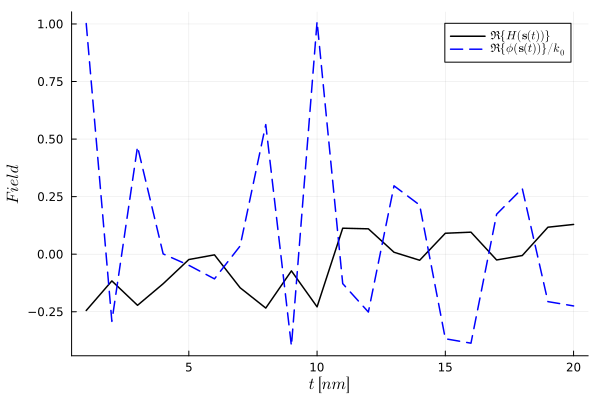

In [70]:
gr()
plot(real.(H[:,1]),c=:black,lw=1.5,label=L"\Re\{ H(\mathbf{s}(t)) \}")
plot!(real.(ϕ[:,1])./k0,c=:blue,lw=1.5,ls=:dash,label=L"\Re\{ \phi(\mathbf{s}(t)) \}/ k_0",xlabel=L"t~[nm]",ylabel=L"Field",legend=:topright)

# ========================================

In [18]:
function constBel(i::Int64,j::Int64,v::Int64,vˡ::Int64,u::Int64,sV::Vector{Float64},layer::layerstructure,k0::Number,Opt::String)
    
    δ(i::Int64,j::Int64) = i == j ? 1 : 0
    δ(Sᵢ::Vector{Float64}) = [0.;1.]⋅Sᵢ == 0 ? 1 : 0
    
    if Opt == "Homo"
        return δ(i,j)*δ(v,vˡ)*0.5*(δ(u,1)-δ(u,2))
    else
        ε1 = layer.mat[1].ε
        εL = layer.mat[end].ε
        
        return δ(i,j)*δ(v,vˡ)*0.5*(δ(u,1)-δ(u,2))+δ(i,j)*δ(v,vˡ)*δ(sV)*δ(u,1)*((εL(k0)-ε1(k0))/(εL(k0)+ε1(k0)))
    end
end

constBel (generic function with 1 method)

In [19]:
layer = layerstructure([mat1,mat2],[0.0,],"up");

In [20]:
k0 = k0
sV = [1.,0.]
i,j = 1,3

v,vˡ = 1,1
u = 1

1

In [21]:
constBel(i,j,v,vˡ,u,sV,layer,k0,"Homo")

0.0

In [22]:
constBel(i,j,v,vˡ,u,sV,layer,k0,"Layer")

0.0

In [23]:
δ(i::Int64,j::Int64) = i == j ? 1 : 0
δ(Sᵢ::Vector{Float64}) = [0.;1.]⋅Sᵢ == 0 ? 1 : 0

δ (generic function with 2 methods)

In [24]:
ε1 = layer.mat[1].ε
εL = layer.mat[end].ε

#15 (generic function with 1 method)

In [25]:
δ(i,j)*δ(v,vˡ)*0.5*(δ(u,1)-δ(u,2))+δ(i,j)*δ(v,vˡ)*δ(sV)*δ(u,1)*((εL(k0)-ε1(k0))/(εL(k0)+ε1(k0)))

0.0

In [26]:
δ(sV)

1

In [27]:
[0.;1.]

2-element Vector{Float64}:
 0.0
 1.0